In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud.wordcloud import WordCloud
from PIL import Image
import seaborn as sns

In [2]:
df = pd.read_csv('Business_review.csv')

C:\Users\Hanso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,3_-fne2m2GvKESZRlULAiw,jTvKkNTat9QftSxL_FMcQw,5.0,2017-02-22,"They make a plan, for your mouth to get health...",0.0,0.0,0.0
1,1,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,5gJk64TDq5lqSuoNiaqjVQ,IG6XMgQyWF2_RW1nKEioxA,5.0,2015-01-20,I have extreme anxiety when it comes to the de...,1.0,0.0,0.0
2,2,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,5570rwX_o30Z3NmKhou4CQ,2Rh41EBjWI137N2m5VHJJA,5.0,2013-06-06,I've only been here once but my husband has be...,3.0,0.0,0.0
3,3,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,iRm438GDAajUiW2GoIAvtA,YcmNpPM0ag94g4T0zAtdcg,4.0,2016-05-07,Great experience with the hygenists and pediat...,0.0,0.0,0.0
4,4,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,9lhJwhRwTsqqPyyoSjMuqw,XGL7VDkeUyM5nKQspJBTNw,5.0,2014-04-13,My husband and I went to this dentist as a rec...,1.0,0.0,0.0


In [4]:
df['categories'].value_counts(20)

Mexican;Restaurants                                                                                          1.034102e-02
Restaurants;Mexican                                                                                          8.836742e-03
Pizza;Restaurants                                                                                            5.560024e-03
Chinese;Restaurants                                                                                          5.335380e-03
Restaurants;Chinese                                                                                          5.238453e-03
                                                                                                                 ...     
Active Life;Skate Shops;Shopping;Recreation Centers;Sporting Goods;Parks;Skate Parks                         3.801076e-07
Nail Salons;Tanning;Skin Care;Beauty & Spas                                                                  3.801076e-07
Hair Removal;Makeup Arti

In [12]:
df.name=df.name.str.replace('"','')
df.address=df.address.str.replace('"','')

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=df.loc[df['state'].isin(states)]
df.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,3_-fne2m2GvKESZRlULAiw,jTvKkNTat9QftSxL_FMcQw,5.0,2017-02-22,"They make a plan, for your mouth to get health...",0.0,0.0,0.0
1,1,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,5gJk64TDq5lqSuoNiaqjVQ,IG6XMgQyWF2_RW1nKEioxA,5.0,2015-01-20,I have extreme anxiety when it comes to the de...,1.0,0.0,0.0
2,2,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,5570rwX_o30Z3NmKhou4CQ,2Rh41EBjWI137N2m5VHJJA,5.0,2013-06-06,I've only been here once but my husband has be...,3.0,0.0,0.0
3,3,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,iRm438GDAajUiW2GoIAvtA,YcmNpPM0ag94g4T0zAtdcg,4.0,2016-05-07,Great experience with the hygenists and pediat...,0.0,0.0,0.0
4,4,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,...,1.0,Dentists;General Dentistry;Health & Medical;Or...,9lhJwhRwTsqqPyyoSjMuqw,XGL7VDkeUyM5nKQspJBTNw,5.0,2014-04-13,My husband and I went to this dentist as a rec...,1.0,0.0,0.0


In [13]:
us_restaurants=usa[usa['categories'].str.contains('Restaurants')]

In [14]:
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants.category[:20]

<ipython-input-14-effab7250862>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  us_restaurants['category']=pd.Series()
<ipython-input-14-effab7250862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_restaurants['category']=pd.Series()
C:\Users\Hanso\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


61    American
62    American
63    American
64    American
65    American
66    American
67    American
68    American
69    American
70    American
71    American
72    American
73    American
74    American
75    American
76    American
77    American
78    American
79    American
80    American
Name: category, dtype: object

In [15]:
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,is_open,review_id,user_id,stars_y,date,text,useful,funny,cool,category
0,61,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,rnvu74aNIPn93Z9Ue11Epw,bgtr7jOlALe8ay4g7pnf4A,4.0,2016-05-05,I've always enjoyed my time at brick house foo...,0.0,0.0,0.0,American
1,62,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,OE5dH664oSSK_-TvIl263w,ndZOHkG_FWdL4TRd9xRfNQ,2.0,2017-03-19,1st time here. Came w my Unc bc Louies was clo...,0.0,0.0,0.0,American
2,63,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,SWeHmo8uHHWbbv94VdAMeQ,UqtE83J-6NMQNNJzpnWwEQ,1.0,2015-08-31,Worse service ever andI use to be a server so ...,0.0,0.0,0.0,American
3,64,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,fCCL0pAgYGccUs8shHHIUA,PixAmdRa58XZ3hr8YLS36g,5.0,2015-10-09,I am updating my review to 5-stars because I t...,2.0,0.0,2.0,American
4,65,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,-VOh0NNnIo1r24hjwSZL4Q,Hly0NEWXMxbuXa2zm_NJOQ,4.0,2015-01-15,I enjoyed this place. I went the night the Bu...,0.0,0.0,0.0,American
5,66,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,-2DEY5my1zyafrArLJF2cA,nNpkJm7bzaw0NN-UpNzMsw,4.0,2014-10-08,Never had to pee so bad in my life. Here's my ...,1.0,1.0,1.0,American
6,67,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,1tDP3uUC16Mnu_gSFqUSDA,PL-fhNBow6lRmxNnHWcXZw,2.0,2014-10-01,First time there tonight. My boyfriend and I w...,2.0,0.0,0.0,American
7,68,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,tONz1aJvU3xw70u2ylbuPw,QUO9ry3teOEd32-OJD83kg,2.0,2016-02-28,"Got the steak and eggs with the ""filet mignon""...",2.0,2.0,0.0,American
8,69,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,5sYAdh5LR355aVGC2b1SAQ,96s7M_uk_Blow-N5_j6ymQ,3.0,2012-03-03,This Brick house has gone Family Friendly and ...,3.0,0.0,0.0,American
9,70,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.47569,...,1.0,_oUHvzxomKT4tS4EvbJDoQ,CB0oWs49o7b8kvvXvx9eJw,3.0,2015-06-21,"Previously, I have gotten the grilled cheese w...",1.0,0.0,0.0,American


In [16]:
us_restaurants.shape

(1866815, 22)

In [17]:
plt.style.use('ggplot')

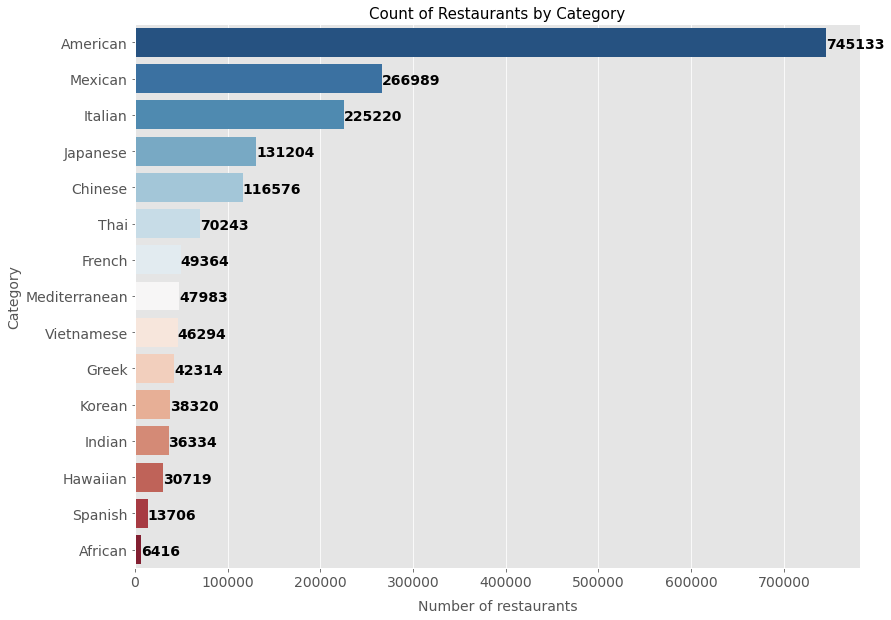

In [18]:
plt.figure(figsize=(13,10))
grouped = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

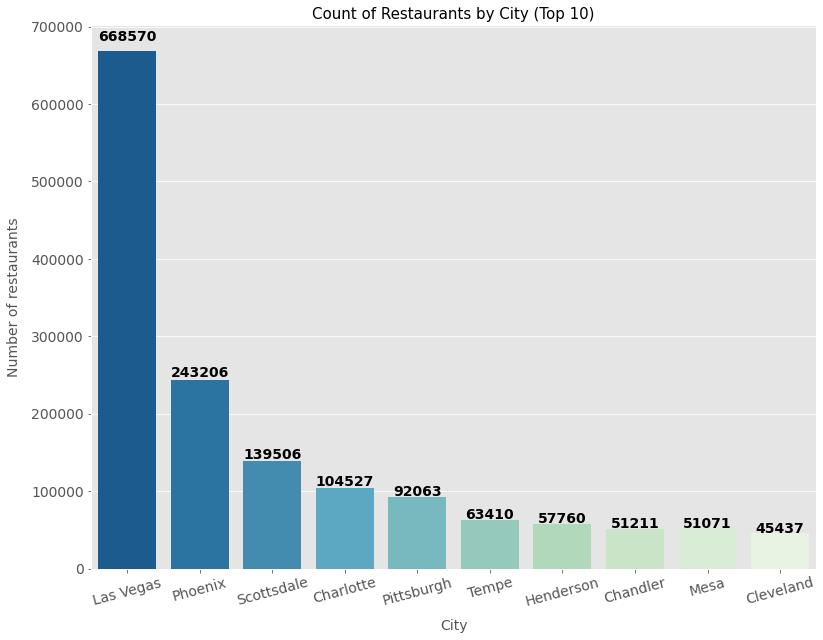

In [19]:
plt.figure(figsize=(13,10))
grouped = us_restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

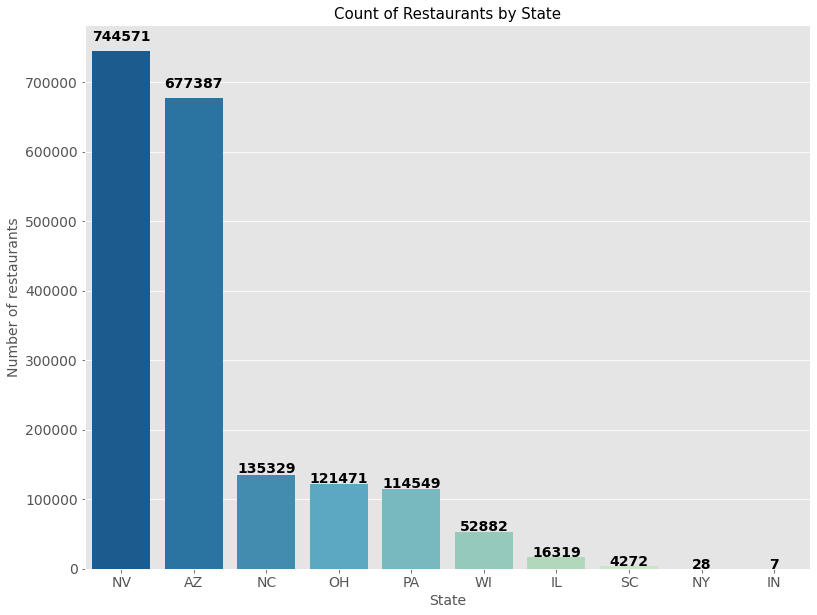

In [20]:
plt.figure(figsize=(13,10))
grouped = us_restaurants.state.value_counts()
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

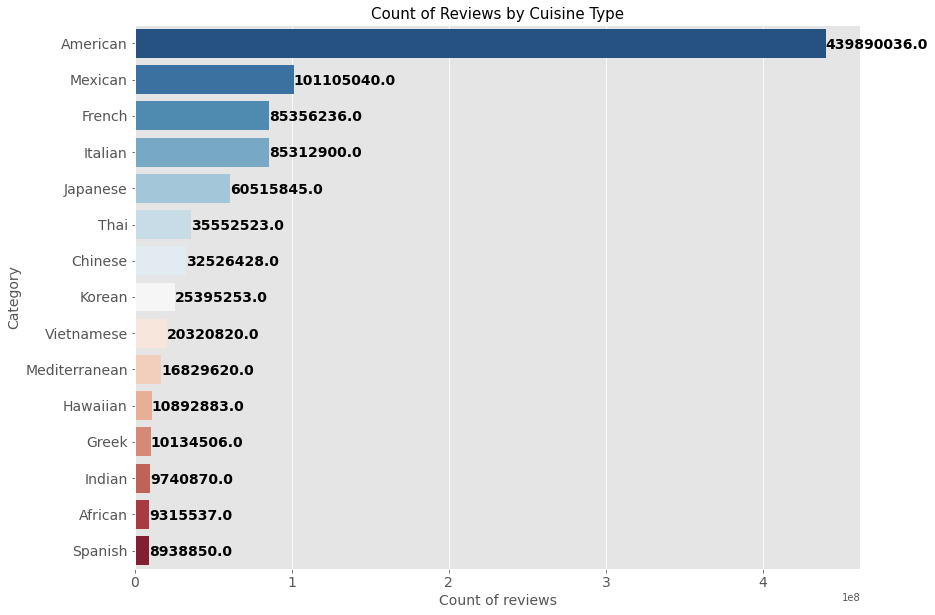

In [21]:
plt.figure(figsize=(13,10))
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

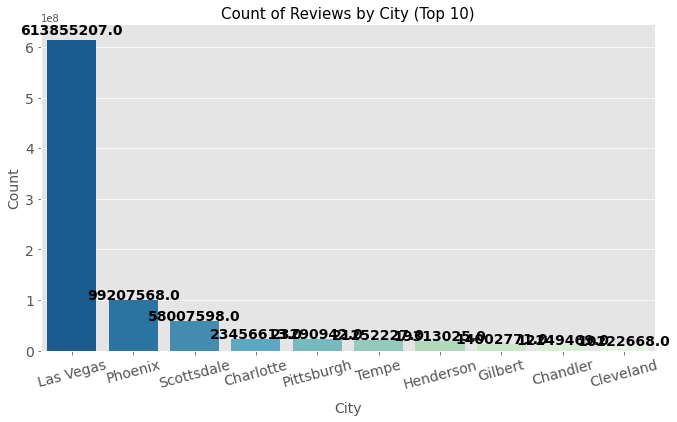

In [22]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)